# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
file_path = '/content/news_share_data.xlsx'
df = pd.read_excel(file_path)
df


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,2014-04-17,0.606557,6,2,0,4.913978,4,...,5709.823,4020.608,1950.000,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,2014-04-17,0.491018,4,2,0,4.674627,6,...,4352.491,2358.572,4200.000,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,2014-04-17,0.634518,3,0,2,4.177665,9,...,6060.771,3296.052,3400.000,0.522917,0.009809,0.025381,0.045685,0.600000,-0.600000,4400
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,2014-04-17,0.447368,7,1,0,4.667961,8,...,4763.083,2709.129,0.000,0.494445,0.144969,0.069903,0.020388,0.833333,0.433333,1900


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [ ]:
print(df.isnull().sum())

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64


In [ ]:
print(df.head())

   article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1   

In [ ]:
print(df.describe())

         article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000     

# **Inferences and find actionable insights from the data**

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month


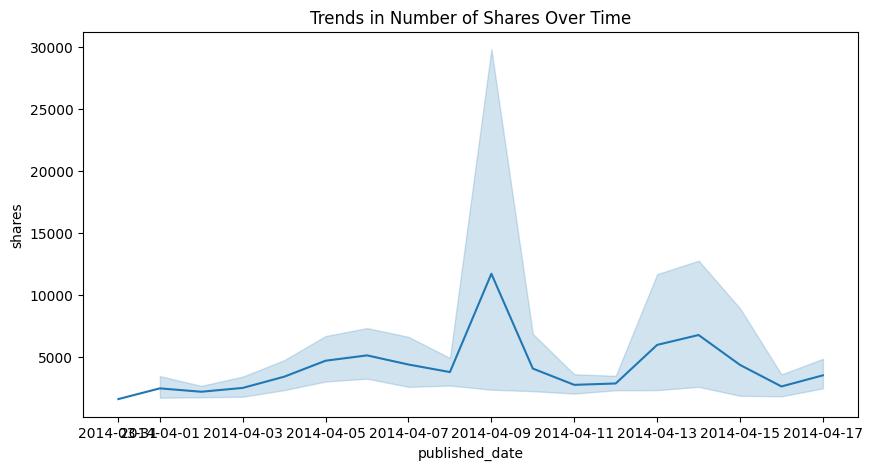

In [ ]:
# Trends in the number of shares over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='published_date', y='shares', data=df)
plt.title('Trends in Number of Shares Over Time')
plt.show()

<ipython-input-93-173df5c61084>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


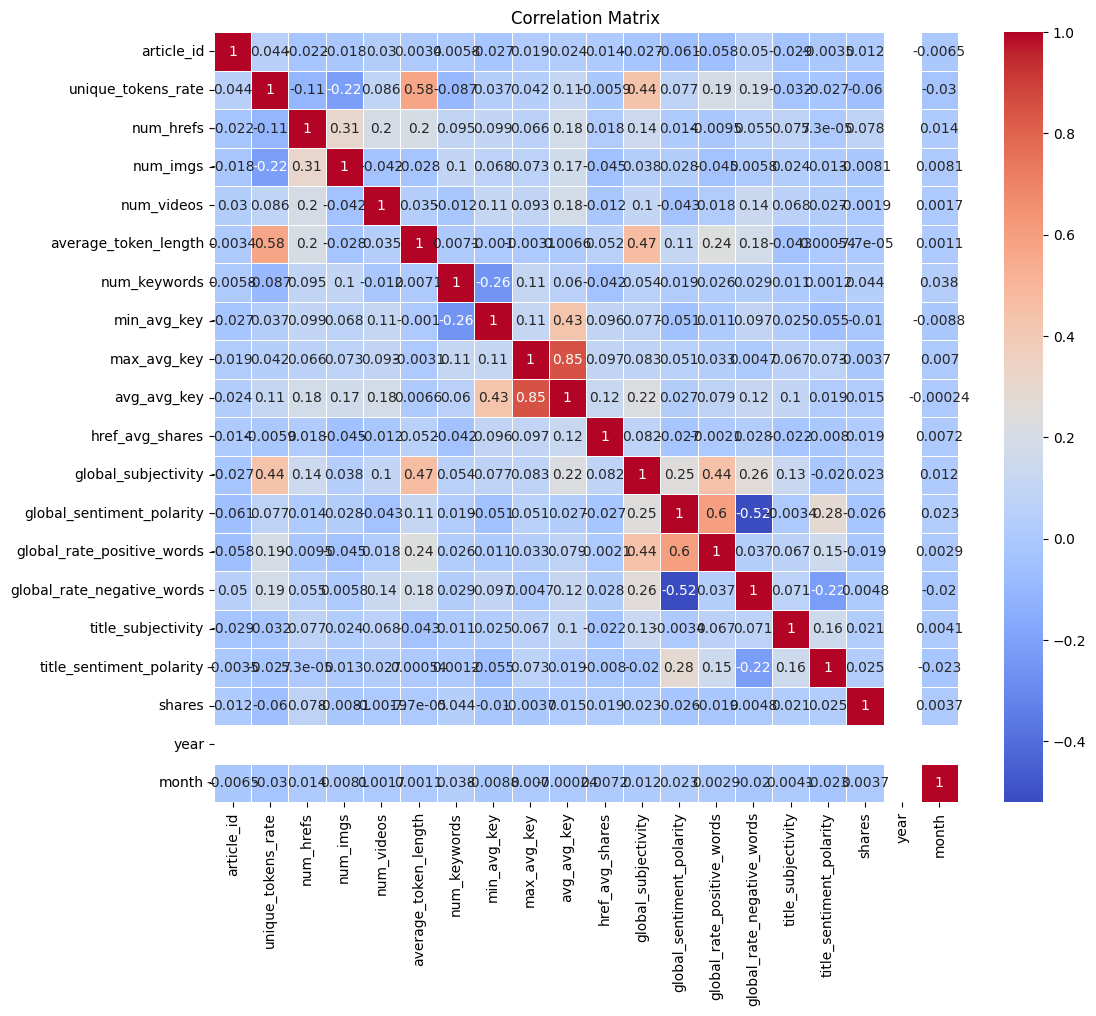

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

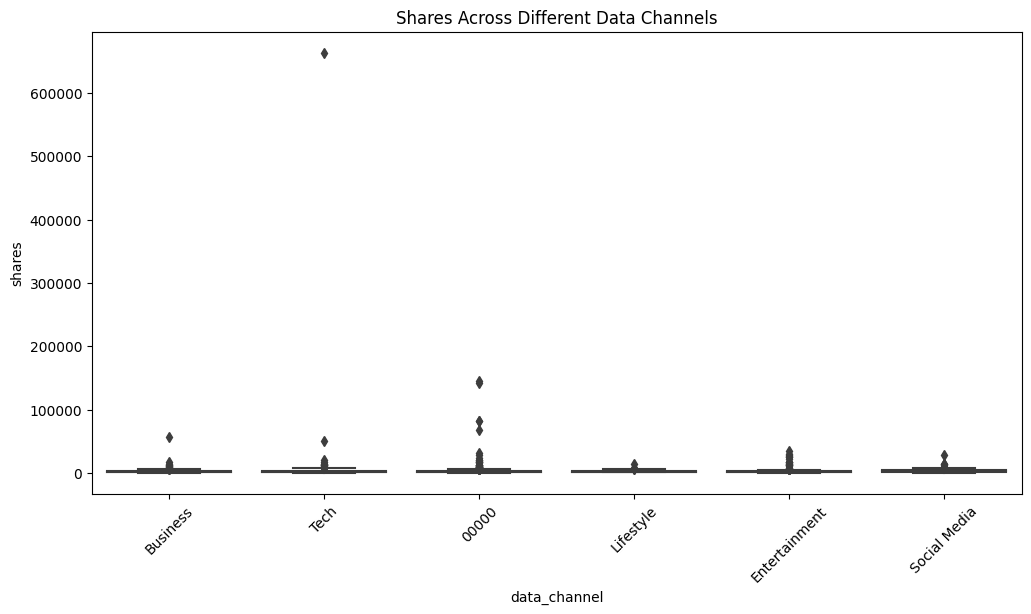

In [ ]:
# Categorical Feature Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='data_channel', y='shares', data=df)
plt.title('Shares Across Different Data Channels')
plt.xticks(rotation=45)
plt.show()

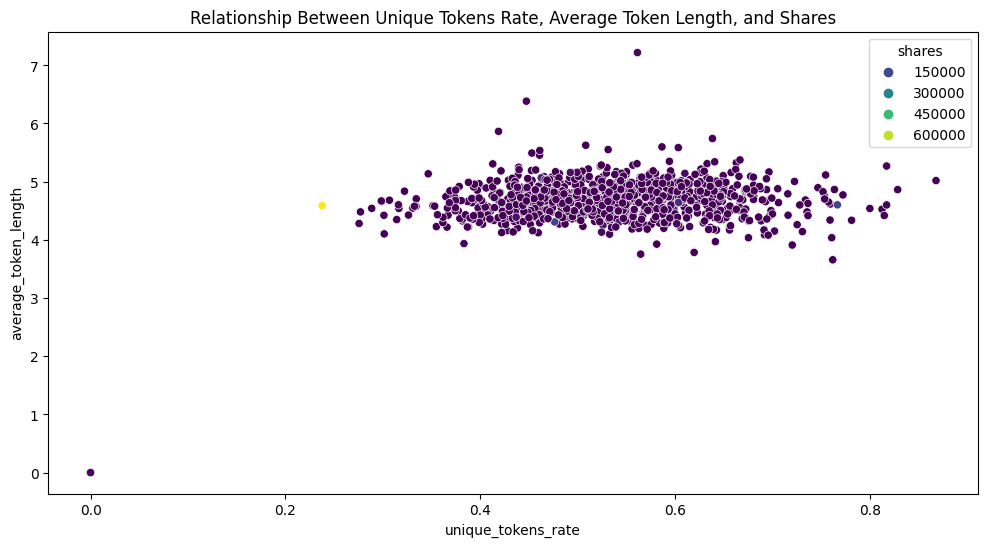

In [ ]:
# Text Data Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='unique_tokens_rate', y='average_token_length', data=df, hue='shares', palette='viridis')
plt.title('Relationship Between Unique Tokens Rate, Average Token Length, and Shares')
plt.show()

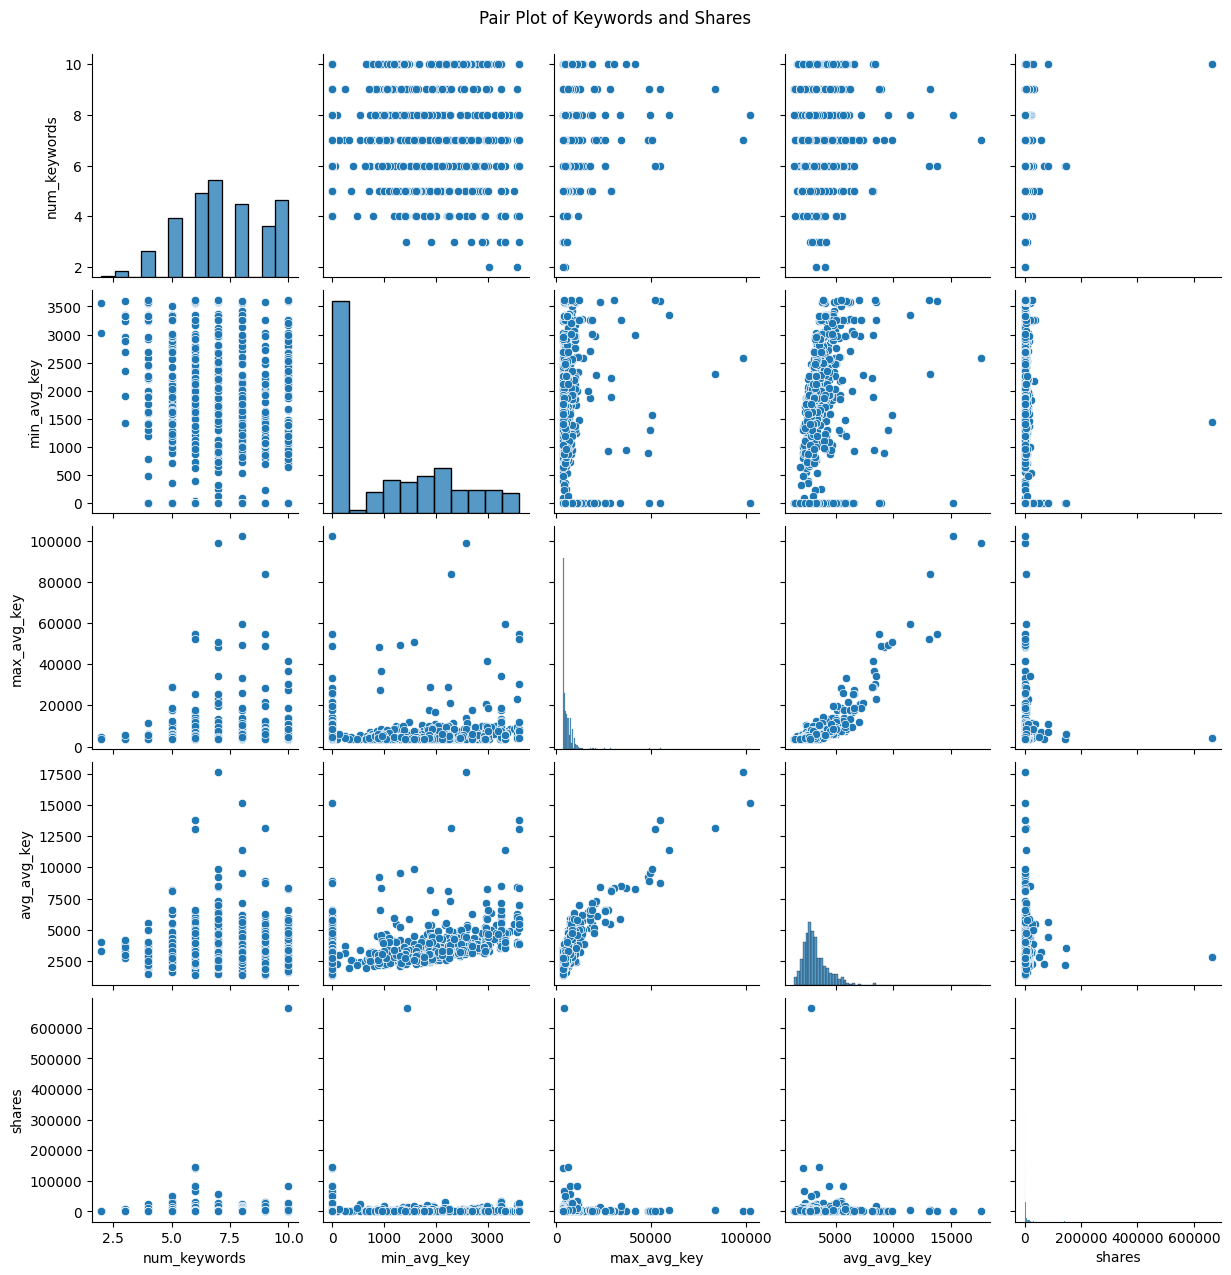

In [ ]:
# Keyword Analysis
sns.pairplot(df[['num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key', 'shares']])
plt.suptitle('Pair Plot of Keywords and Shares', y=1.02)
plt.show()

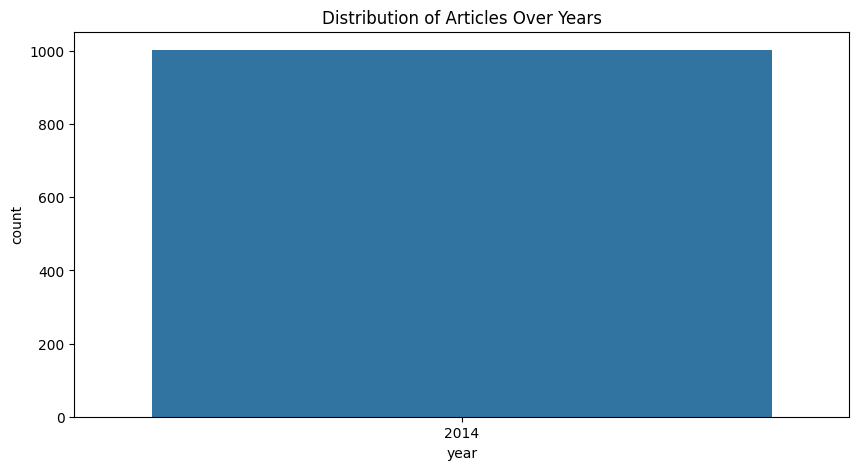

In [ ]:
# Visualizing the temporal trend in the number of articles
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df)
plt.title('Distribution of Articles Over Years')
plt.show()

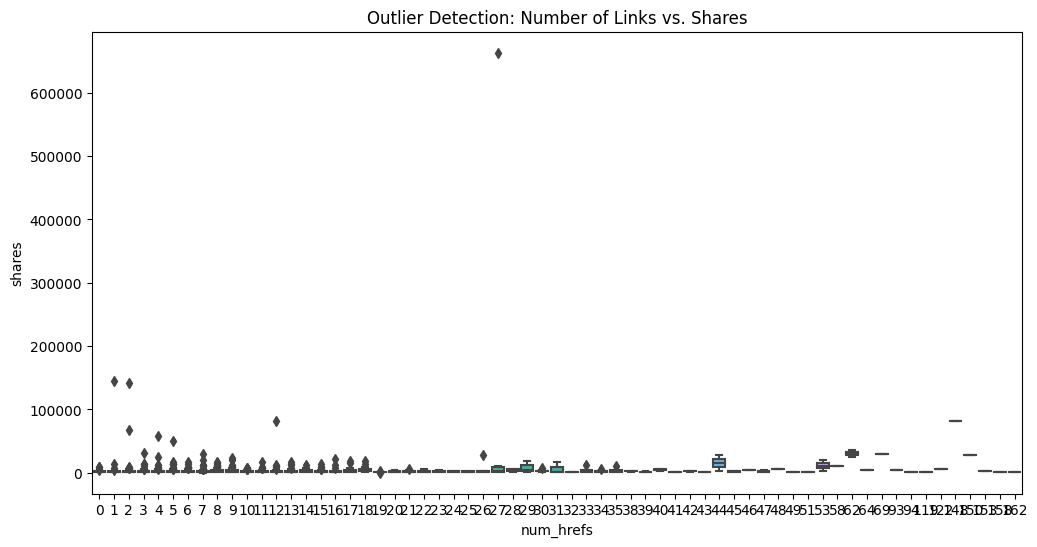

In [ ]:
# Box plot for outlier detection in the number of links vs. shares
plt.figure(figsize=(12, 6))
sns.boxplot(x='num_hrefs', y='shares', data=df)
plt.title('Outlier Detection: Number of Links vs. Shares')
plt.show()

# **Feature Engineering(weekday, is weekend, number of tokens in title**
# **content etc)**

In [ ]:
# Extracting weekday from the published_date
df['weekday'] = df['published_date'].dt.weekday



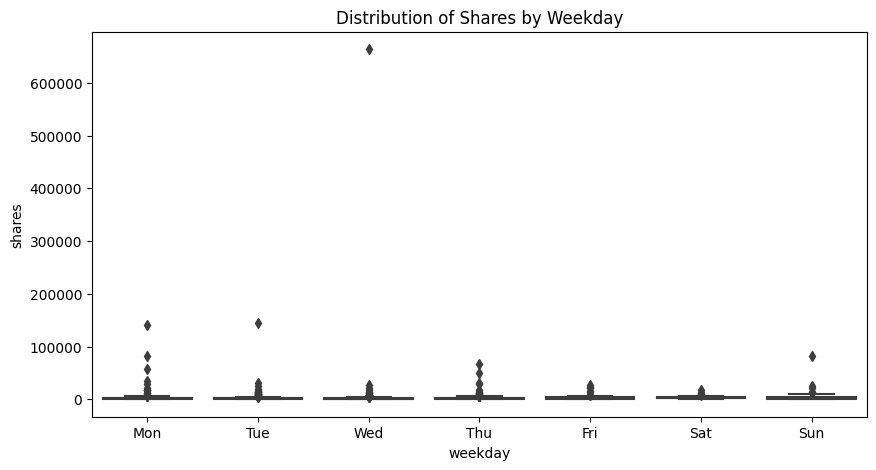

In [ ]:
# Visualizing the distribution of shares by weekday
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='shares', data=df)
plt.title('Distribution of Shares by Weekday')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [ ]:
# Creating a binary feature for weekend
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [ ]:
# Counting the number of tokens in title and content
df['num_tokens_title'] = df['title'].apply(lambda x: len(str(x).split()))
df['num_tokens_content'] = df['text'].apply(lambda x: len(str(x).split()))

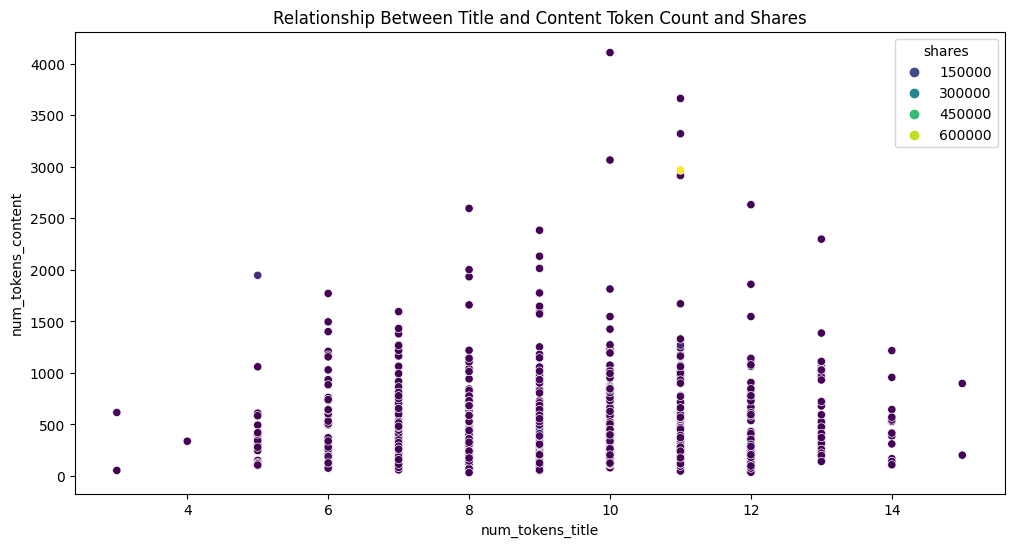

In [ ]:
# Visualizing the relationship between token count and shares
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_tokens_title', y='num_tokens_content', data=df, hue='shares', palette='viridis')
plt.title('Relationship Between Title and Content Token Count and Shares')
plt.show()

# **Make model ready data(data preprocessing)**

In [ ]:
# Handling missing values
df.fillna(df.mean(), inplace=True)


<ipython-input-104-8035c6221358>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-104-8035c6221358>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['data_channel'], drop_first=True)



In [ ]:
df

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,month,weekday,is_weekend,num_tokens_title,num_tokens_content,data_channel_Business,data_channel_Entertainment,data_channel_Lifestyle,data_channel_Social Media,data_channel_Tech
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,3,0,0,6,171,1,0,0,0,0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,4,1,0,10,80,0,0,0,0,1
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,4,1,0,14,388,0,0,0,0,1
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,...,4,1,0,6,235,0,0,0,0,1
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,...,4,1,0,9,243,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,2014-04-17,0.606557,6,2,0,4.913978,4,...,4,3,0,12,97,1,0,0,0,0
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,2014-04-17,0.491018,4,2,0,4.674627,6,...,4,3,0,9,206,0,0,0,0,1
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,2014-04-17,0.634518,3,0,2,4.177665,9,...,4,3,0,13,141,0,1,0,0,0
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,2014-04-17,0.447368,7,1,0,4.667961,8,...,4,3,0,7,778,1,0,0,0,0


In [ ]:
# Tokenize and vectorize title and text
vectorizer = CountVectorizer()
title_vectorized = vectorizer.fit_transform(df['title'])
text_vectorized = vectorizer.fit_transform(df['text'])

# Convert to DataFrames and concatenate with the original DataFrame
title_df = pd.DataFrame(title_vectorized.toarray(), columns=[f'title_{i}' for i in range(title_vectorized.shape[1])])
text_df = pd.DataFrame(text_vectorized.toarray(), columns=[f'text_{i}' for i in range(text_vectorized.shape[1])])

df = pd.concat([df, title_df, text_df], axis=1)

# Drop the original text and title columns
df.drop(['title', 'text'], axis=1, inplace=True)



In [ ]:
# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
                      'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
                      'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words',
                      'title_subjectivity', 'title_sentiment_polarity', 'num_tokens_title', 'num_tokens_content']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Log-transform the target variable
df['shares'] = np.log1p(df['shares'])


In [ ]:
# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())


article_id            0
published_date        0
unique_tokens_rate    0
num_hrefs             0
num_imgs              0
                     ..
text_25443            0
text_25444            0
text_25445            0
text_25446            0
text_25447            0
Length: 28903, dtype: int64
0


In [ ]:
# Check for infinite or NaN values
print(np.isfinite(X_train).all())
print(np.isfinite(y_train).all())


article_id            True
published_date        True
unique_tokens_rate    True
num_hrefs             True
num_imgs              True
                      ... 
text_25443            True
text_25444            True
text_25445            True
text_25446            True
text_25447            True
Length: 28903, dtype: bool
True


In [ ]:
# Define features and target variable
X = df.drop('shares', axis=1)
y = df['shares']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Build Regression models to predict shares for the news article**

In [ ]:
# Identify datetime columns
datetime_columns_train = X_train.select_dtypes(include='datetime64').columns
datetime_columns_test = X_test.select_dtypes(include='datetime64').columns

# Exclude datetime columns from X_train and X_test
X_train = X_train.drop(datetime_columns_train, axis=1)
X_test = X_test.drop(datetime_columns_test, axis=1)

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the Linear Regression model
linear_reg_model.fit(X_train, y_train)


# Make predictions
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"R-squared (Linear Regression): {r2_linear}")

Mean Squared Error (Linear Regression): 1.3750958305764365
R-squared (Linear Regression): -0.4704022711538769


In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 0.8589442016583352
R-squared (Random Forest): 0.08152328235667317


# **Find the best model to predict the share per article**

In [ ]:
# Initialize the model
linear_reg_model = LinearRegression()

# Fit the model
linear_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")


Linear Regression:
Mean Squared Error: 1.3750958305764365
R-squared: -0.4704022711538769


In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")



Random Forest Regressor:
Mean Squared Error: 0.8589442016583352
R-squared: 0.08152328235667317


In [ ]:
# Example for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nBest Random Forest Regressor:")
print(f"Mean Squared Error: {mse_best_rf}")
print(f"R-squared: {r2_best_rf}")



Best Random Forest Regressor:
Mean Squared Error: 0.8539077103472278
R-squared: 0.08690884756444095
